# Week 3: Linear Regression and Environmental Justice
The **objective** is to measure trends in data.  We're looking for correlations between variables, and the "tighteness" of that correlation.  We can't talk about causality.  That's the domain of econometrics.  But we _can_ use the data to ask the right or _relevant_ questions.

In [3]:
import pandas
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
df = pandas.read_csv("https://github.com/danhammer/envirods/blob/main/data/EJSCREEN_demo3.csv?raw=true")
df.describe()

,D_OZONE_2,D_PM25_2,OZONE,PM25,VULEOPCT,ACSTOTPOP,LOWINCPCT,MINORPCT,ID,demographic_index,fips
count,216046.000000,216046.000000,216046.000000,216046.000000,216046.000000,216046.000000,216046.000000,216046.000000,2.160460e+05,2.160460e+05,216046.000000
mean,119.334165,141.804077,42.809740,8.471473,0.351639,1484.420809,0.334941,0.368337,2.823431e+11,6.446145e-17,28234.046842
std,16723.377651,3444.401415,6.582827,1.490363,0.226204,989.572104,0.211581,0.313300,1.569860e+11,2.262036e-01,15698.596138
min,-371198.063720,-90644.530105,24.953781,4.004773,0.000000,0.000000,0.000000,0.000000,1.001020e+10,-3.516392e-01,1001.000000
25%,-9157.996323,-1746.870154,39.409066,7.640961,0.170226,892.000000,0.164487,0.097070,1.311713e+11,-1.814132e-01,13117.000000
50%,-2796.255871,-538.105932,42.785367,8.514723,0.290369,1268.000000,0.303243,0.271214,2.810795e+11,-6.127004e-02,28107.000000
75%,7609.474718,1563.734759,45.509500,9.254419,0.507526,1818.000000,0.476502,0.603545,4.105100e+11,1.558864e-01,41051.000000
max,272045.350467,62799.333874,75.941846,16.459907,1.000000,55407.000000,1.000000,1.000000,5.604595e+11,6.483608e-01,56045.000000


Suppose we wanted to examine the distribution of population of the 

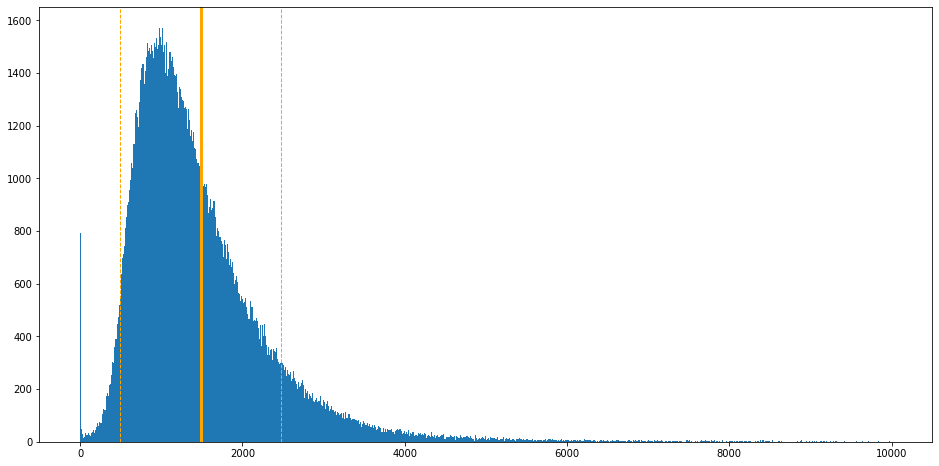

In [5]:
# Set figure size
plt.figure(figsize=(16, 8))

# Assign the plot to a variable, just to suppress output in Notebooks
fig = plt.hist(
    df["ACSTOTPOP"], 
    range=[0,10000], 
    bins=1000
)

# Add a vertical line at the mean value, and standard deviations
plt.axvline(
    df.ACSTOTPOP.mean(), 
    linewidth=3, 
    color="orange"
)

plt.axvline(
    df.ACSTOTPOP.mean()-df.ACSTOTPOP.std(), 
    linewidth=1, 
    color="orange",
    linestyle="dashed"
)

plt.axvline(
    df.ACSTOTPOP.mean()+df.ACSTOTPOP.std(), 
    linewidth=1, 
    color="orange",
    linestyle="dashed"
)

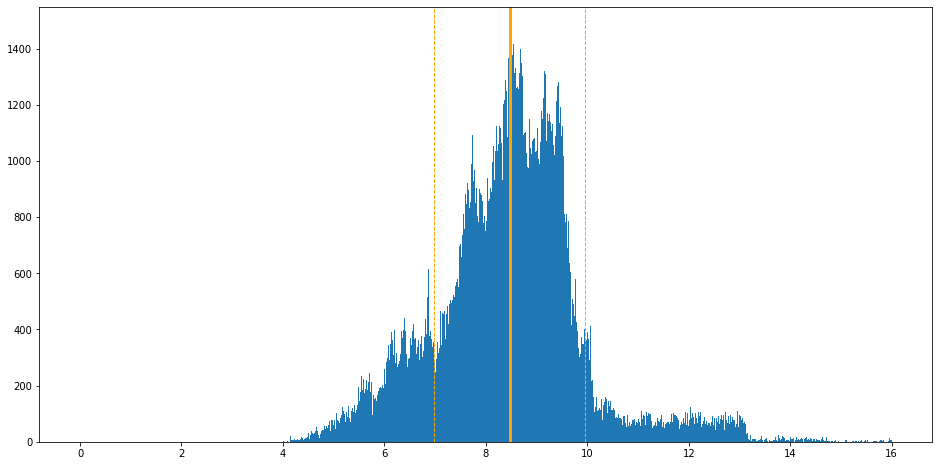

In [6]:
plt.figure(figsize=(16, 8))

# Assign the plot to a variable, just to suppress output in Notebooks
fig = plt.hist(df.PM25, range=[0,16], bins=1000)

# Add a vertical line at the mean value, and standard deviations
plt.axvline(
    df.PM25.mean(), 
    linewidth=3, 
    color="orange"
)

plt.axvline(
    df.PM25.mean()-df.PM25.std(), 
    linewidth=1, 
    color="orange",
    linestyle="dashed"
)

plt.axvline(
    df.PM25.mean()+df.PM25.std(), 
    linewidth=1, 
    color="orange",
    linestyle="dashed"
)

The objective is to fit a line that is defined by $y=mx+b$ so that the coefficient $m$ and the intercept $b$ are chosen to minimize the errors between the line and the actual observations.  We use ordinary least squares to find the slope and intercept of this line - the linear model.  There may be other types of models that better represent the data than a linear model; but a linear model is a good first start, just to get a sense of the data.

Once we have found the $m$ and $b$ that minimize the errors, which we call $\hat{m}$ and $\hat{b}$, we get a predicted $y$ value for each $x$.  We denote and calculate this predicted $y$ value as $\hat{y} = \hat{m} x + \hat{b}$. Note that the $x$ value isn't estimated.  It's just the data.  And therefore has no hat on it.

For a particular record, with index $i$, calculate the predicted $y$ value for that observation as $\hat{y}_i = \hat{m} x_i + \hat{b}$.  Note that the values of $\hat{m}$ and $\hat{b}$ are constant across all observations and, as a result, don't need the $i$ index.

Finally, we denote $\bar{y}$ as the mean for the $y$ variable, across all observations.

In [7]:
m, b, _, _, _ = stats.linregress(df.PM25, df.D_PM25_2)
print("slope: " + str(m))
print("slope: %s" % m)
print(f"slope: {m}")
print(f"intercept: {b}")

slope: 620.0056991018266
slope: 620.0056991018266
slope: 620.0056991018266
intercept: -5110.557334718789


(-20000.0, 20000.0)

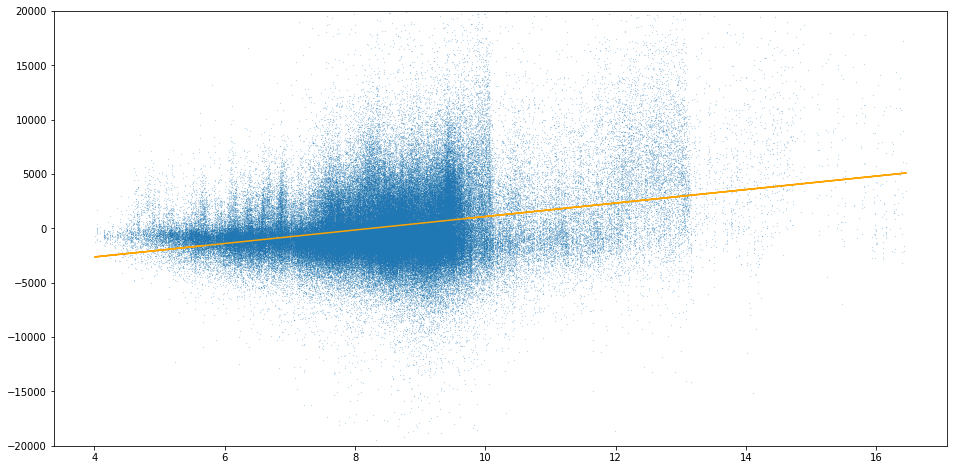

In [8]:
plt.figure(figsize=(16, 8))
plt.scatter(
    df.PM25,
    df.D_PM25_2,
    s=0.01
)

plt.plot(df.PM25, m*df.PM25 + b, color="orange")
plt.ylim([-20000, 20000])

In [9]:
m, b, _, _, _ = stats.linregress(df.demographic_index, df.D_PM25_2)
print(f"slope: {m}")
print(f"intercept: {b}")

slope: 12503.341791122128
intercept: 141.80407727682672


The R-squared, or coefficient of correlation, or coefficient of determination is a measure of how much of the variation can be explained by the linear model.  A higher $R^2$ value indicates that the linear model explains more of the variation - there is less variation relegated to the residuals, relative to the total variation.

$$ R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum_{i} (y_i - \hat{y}_{i})^{2}}{\sum_{i} (y_i - \bar{y})^{2}}$$

In [10]:
m, b, _, _, _ = stats.linregress(df.PM25, df.D_PM25_2)
df["yhat"] = m*df.PM25 + b
rss = sum((df.D_PM25_2 - df.yhat)**2)
tss = sum((df.D_PM25_2 - df.D_PM25_2.mean())**2)

1 - rss/tss

0.0719694360088452

In [11]:
m, b, r, _, _ = stats.linregress(df.PM25, df.D_PM25_2)

r**2

0.07196943600882912

In [13]:
m, b, _, _, _ = stats.linregress(df.demographic_index, df.D_PM25_2)
df["yhat"] = m*df.demographic_index + b
rss = sum((df.D_PM25_2 - df.yhat)**2)
tss = sum((df.D_PM25_2 - df.D_PM25_2.mean())**2)

1 - rss/tss

0.6742545686316713

In [14]:
m, b, r, _, _ = stats.linregress(df.demographic_index, df.D_PM25_2)

r**2

0.6742545686316732